In [ ]:
"""
1.
     Objective of the project: to use ML predicting credit card application approval.
     
     Method of analysis: preprocessing the dataset first, then we can use logistic regression and
     decision tree, or even more algorithms.
     
     X variables: All columns except Y varibale, ID, FLAG_MOBIL, FLAG_WORK_PHONE,FLAG_PHONE, and FLAG_EMAIL
     Y variable: STATUS (1 for bad client, 0 for good client)
     
     Columns descriptions: From first column to last--- Customer ID, Gender, Whether they have a car,
                          Whether they have realty, Number of children, Annual income, Income category,
                          Education level, Marital status, Way of living, age, years employed, 
                          Whether they have a mobile phone, Whether they have a work phone
                          Whether they have a phone, Whether they have email, family size, and approval or no.
"""

In [31]:
# read csv
df = spark.read.csv('s3://mybucketname32/Project/Credit_Card.csv',
                    header=True,
                    inferSchema=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
#take a look at the df, and let's show just one record for simplicity
df.show(1, vertical=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

-RECORD 0-------------------------------
 ID                  | 5008804          
 CODE_GENDER         | M                
 FLAG_OWN_CAR        | Y                
 FLAG_OWN_REALTY     | Y                
 CNT_CHILDREN        | 0                
 AMT_INCOME_TOTAL    | 427500.0         
 NAME_INCOME_TYPE    | Working          
 NAME_EDUCATION_TYPE | Higher education 
 NAME_FAMILY_STATUS  | Civil marriage   
 NAME_HOUSING_TYPE   | Rented apartment 
 AGE_YEARS           | 33               
 YEARS_EMPLOYED      | 12               
 FLAG_MOBIL          | 1                
 FLAG_WORK_PHONE     | 1                
 FLAG_PHONE          | 0                
 FLAG_EMAIL          | 0                
 CNT_FAM_MEMBERS     | 2                
 STATUS              | 1                
only showing top 1 row

In [ ]:
#Record sucessfully showed

In [3]:
"""
2.
    Check duplicate first, then check missing value
"""
# Let's check duplicate first, we'll print out the number of rows vs number of distinct row
# We'll also count the number of duplicate ID because that's critical to check
print(df.count(), df.distinct().count())
df.rdd.map(
           lambda row: (
                 row['ID']
               , sum([c == None for c in row])
           )
        )\
        .filter(lambda el: el[1] >= 1)\
        .count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

36457 36457
0

In [ ]:
# 36457 seems like there is no duplicate, and 0 means there is no duplicate for ID columns
# So we don't need to remove duplicate in this case

In [4]:
# Let's check missing value, we'll print out the number of missing rows
print(df.rdd.map(
           lambda row: (
                 row['ID']
               , sum([c == None for c in row])
           )
        )\
        .filter(lambda el: el[1] >= 1)\
        .count())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

0

In [ ]:
#Fortunately, 0 means there is no missing value, we can move to the next step

In [5]:
'''
3.
    Descriptive statistics and interpretation
'''
#These code will generate descriptive statistics
#There are many columns that's not suitable for descriptive statistics.
#We'll only show the fit ones, total of four.
print(df.select('CNT_CHILDREN').describe().show())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-------------------+
|summary|       CNT_CHILDREN|
+-------+-------------------+
|  count|              36457|
|   mean|0.43031516581177826|
| stddev| 0.7423669007186852|
|    min|                  0|
|    max|                 19|
+-------+-------------------+

None

In [ ]:
#For Number of children column, we can see that there are 36457 records
#Mean and SD are not really meaningful here, but min and max we can see one client has 19 children

In [6]:
#This code will show the annual income statistic
print(df.select('AMT_INCOME_TOTAL').describe().show())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+------------------+
|summary|  AMT_INCOME_TOTAL|
+-------+------------------+
|  count|             36457|
|   mean|186685.73666236937|
| stddev|101789.22648234623|
|    min|           27000.0|
|    max|         1575000.0|
+-------+------------------+

None

In [ ]:
#Total of 36457 records, and the mean is about 186685
#Looking at the max value, it's a outliers for sure. Same thing applies to min value, 27000 is pretty low

In [7]:
#This code will show the years of employed statistic
print(df.select('YEARS_EMPLOYED').describe().show())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-----------------+
|summary|   YEARS_EMPLOYED|
+-------+-----------------+
|  count|            36457|
|   mean|6.038099679073977|
| stddev|6.489479508635842|
|    min|                0|
|    max|               43|
+-------+-----------------+

None

In [ ]:
#Average for 6 yrs of employed for many client
#Of course, there may be many people never had a job, so it shows 0
#The highest value is 43 yrs, it's so long for one to stay in one company

In [8]:
#Last column for statistic. This code will show the number of family members, or family size statistic
print(df.select('CNT_FAM_MEMBERS').describe().show())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+------------------+
|summary|   CNT_FAM_MEMBERS|
+-------+------------------+
|  count|             36457|
|   mean| 2.198452971994404|
| stddev|0.9116861437101033|
|    min|                 1|
|    max|                20|
+-------+------------------+

None

In [ ]:
#Average family size is about 2. It's shocking to see one client has 20 family members
#The min value shows 1 is because the number including the clients themselve, so the lowest number is 1

In [ ]:
#Three out of four variables we plan to do removing outliers later
#That's why we show them in this steps to get some basic statistics and having a clearer picture

In [ ]:
'''
4.
    Visualization
'''

In [ ]:
#We'll install matplotlib first, then restart the kernal

In [27]:
%%local
!pip3 install --user matplotlib

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

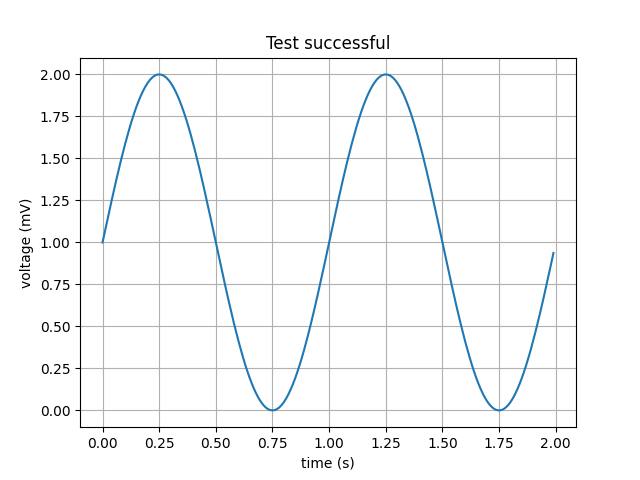

In [3]:
#Test out if it works
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)
fig, ax = plt.subplots()
ax.plot(t, s)
ax.set(xlabel='time (s)', ylabel='voltage (mV)', title='Test successful')
ax.grid()
plt.show()
%matplot plt

In [ ]:
#Success for testing, and can move on
#Starting with numerical columns, the first one would be number of children

In [10]:
#Getting bin first, and the counts
histogram_chd = df.select('CNT_CHILDREN').rdd.flatMap(lambda x: x).histogram(3)
for i in range(len(histogram_chd[0]) - 1):
    print('[' + str(round(histogram_chd[0][i], 2)) + ',' +
          str(round(histogram_chd[0][i + 1], 2)) + ')')
sorted(zip(*histogram_chd))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[0.0,6.33)
[6.33,12.67)
[12.67,19)
[(0.0, 36451), (6.333333333333333, 2), (12.666666666666666, 4)]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

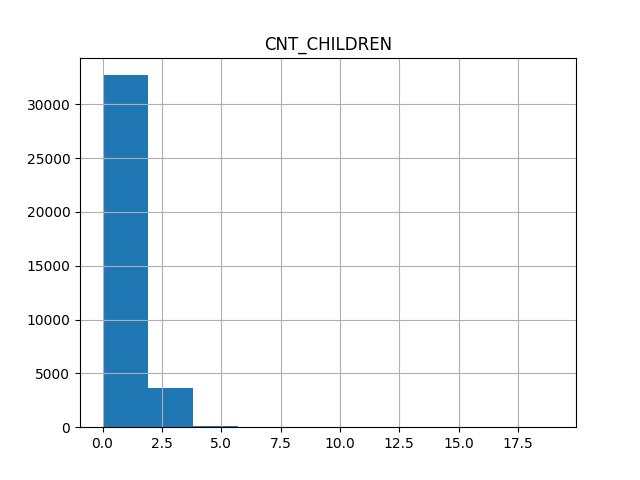

In [11]:
#Ready for visualization
df.select('CNT_CHILDREN').toPandas().hist()
%matplot plt

In [ ]:
#Total of 36451 records fall into bin one, only 2 records fall into bin two, and 4 are in bin three
#This can tell us majority of people have less than 6 children, or more specificly, most people have 0 children 
#bin two and bin three are consider outliers

In [12]:
#Continue with numerical columns, the next one would be annual income
#Getting bin first, and the counts
histogram= df.select('AMT_INCOME_TOTAL').rdd.flatMap(lambda x: x).histogram(5)
for i in range(len(histogram[0]) - 1):
    print('[' + str(round(histogram[0][i], 2)) + ',' +
          str(round(histogram[0][i + 1], 2)) + ')')
sorted(zip(*histogram))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[27000.0,336600.0)
[336600.0,646200.0)
[646200.0,955800.0)
[955800.0,1265400.0)
[1265400.0,1575000.0)
[(27000.0, 33840), (336600.0, 2373), (646200.0, 223), (955800.0, 7), (1265400.0, 14)]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

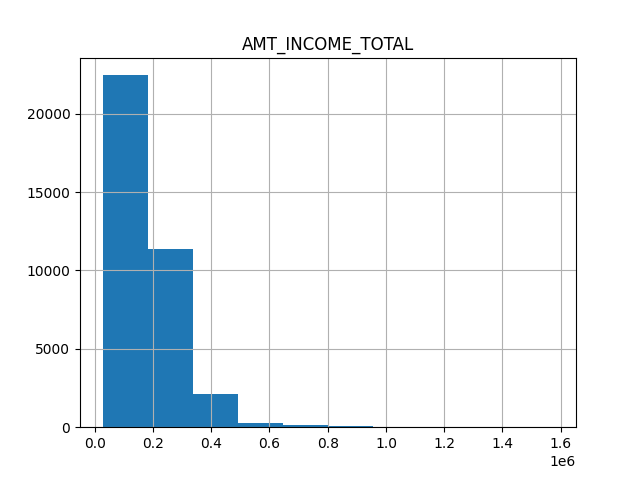

In [13]:
#Ready for visualization
df.select('AMT_INCOME_TOTAL').toPandas().hist()
%matplot plt

In [ ]:
#Divided the data into 5 bins
#33840 peoples' annual income is between 27000 to 336600
#Bin two's range is 336600 to 646200, there are 2373 people in this range
#Other bins can be considered as outliers

In [14]:
#Continue with numerical columns, the next one would be age
#Getting bin first, and the counts
histogram= df.select('AGE_YEARS').rdd.flatMap(lambda x: x).histogram(5)
for i in range(len(histogram[0]) - 1):
    print('[' + str(round(histogram[0][i], 2)) + ',' +
          str(round(histogram[0][i + 1], 2)) + ')')
sorted(zip(*histogram))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[21.0,30.6)
[30.6,40.2)
[40.2,49.8)
[49.8,59.4)
[59.4,69)
[(21.0, 5526), (30.6, 10389), (40.2, 8370), (49.8, 7904), (59.4, 4268)]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

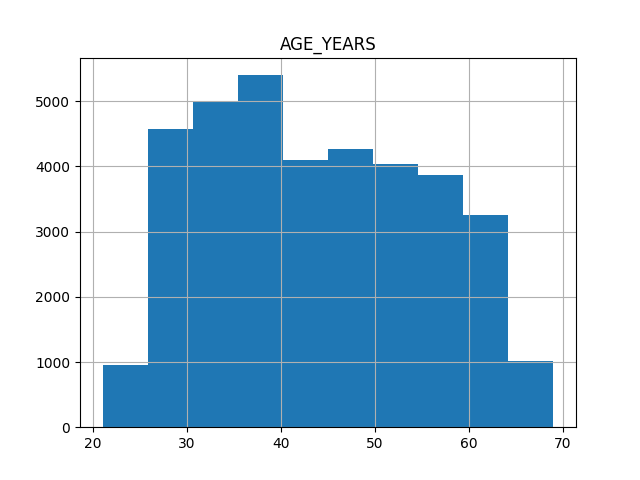

In [15]:
#Ready for visualization
df.select('AGE_YEARS').toPandas().hist()
%matplot plt

In [ ]:
#It's not like a bell curve
#5526 people are between age 21 to 30, although we expect people in these ages needs credit card
#10389 people are between age 30 to 40, these age range is those who already have family
#Other bins seem fine. 
#One interesting thing to see that still many people between age 59 to 69 are applying credit card

In [16]:
#Continue with numerical columns, the next one would be yrs employed
#Getting bin first, and the counts
histogram = df.select('YEARS_EMPLOYED').rdd.flatMap(lambda x: x).histogram(7)
for i in range(len(histogram[0]) - 1):
    print('[' + str(round(histogram[0][i], 2)) + ',' +
          str(round(histogram[0][i + 1], 2)) + ')')
sorted(zip(*histogram))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[0.0,6.14)
[6.14,12.29)
[12.29,18.43)
[18.43,24.57)
[24.57,30.71)
[30.71,36.86)
[36.86,43)
[(0.0, 23444), (6.142857142857143, 8082), (12.285714285714286, 2776), (18.42857142857143, 1318), (24.571428571428573, 549), (30.714285714285715, 205), (36.85714285714286, 83)]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

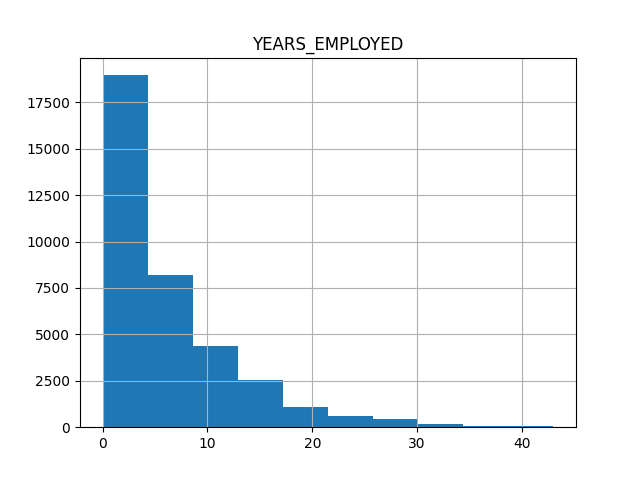

In [17]:
#Ready for visualization
df.select('YEARS_EMPLOYED').toPandas().hist()
%matplot plt

In [ ]:
#Looking at the trend, we can see that there are fewer people as the employed yrs increase
#23444 people are been employed between 0 to 6 yrs, and still have 8082 people been emplyed 6 to 12 yrs
#It's really hard for one to stay for a single job that long. This chart really makes common sense

In [18]:
#Continue with numerical columns, the next one would be family size
#Getting bin first, and the counts
histogram = df.select('CNT_FAM_MEMBERS').rdd.flatMap(lambda x: x).histogram(4)
for i in range(len(histogram[0]) - 1):
    print('[' + str(round(histogram[0][i], 2)) + ',' +
          str(round(histogram[0][i + 1], 2)) + ')')
sorted(zip(*histogram))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[1.0,5.75)
[5.75,10.5)
[10.5,15.25)
[15.25,20)
[(1.0, 36374), (5.75, 79), (10.5, 3), (15.25, 1)]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

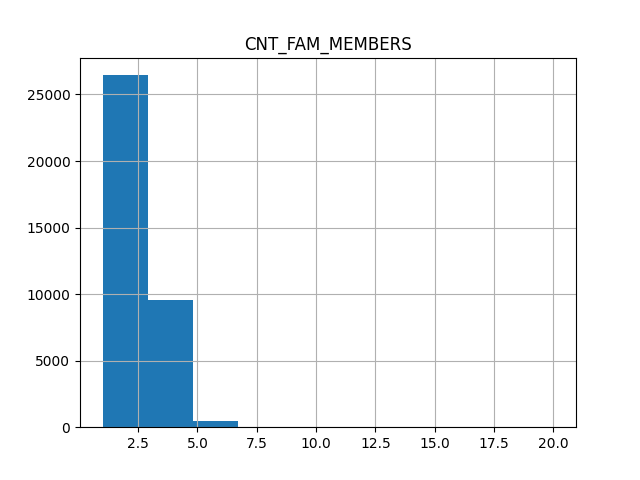

In [19]:
#Ready for visualization
df.select('CNT_FAM_MEMBERS').toPandas().hist()
%matplot plt

In [ ]:
#As mentioned before, the min value is 1 because it includes client themselve
#Majority of clients having between around 1 to 6 family members
#It's hard to see in the graph, there is a outlier which has 20 family members

In [20]:
#Time to start with Categorical columns, the first one would be gender
#Getting the counts first
df.groupBy('CODE_GENDER').count().orderBy('Count').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+-----+
|CODE_GENDER|count|
+-----------+-----+
|          M|12027|
|          F|24430|
+-----------+-----+

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

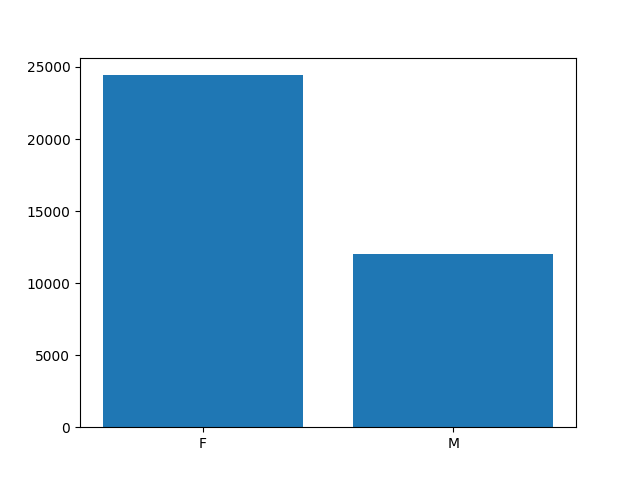

In [32]:
#Selected out the columns
#Ready for visualization
plt.close()
df1= df.toPandas()
g = df1['CODE_GENDER'].value_counts()
plt.bar(g.index,g.values)
plt.show()
%matplot plt

In [ ]:
#Just as the freqenucy shows, female clients are about double as male clients
#We think gender doesn't have siginificant impact toward card approval

In [13]:
#Continue with Categorical columns, the next one would be whether having car or not
#Getting the counts first
df.groupBy('FLAG_OWN_CAR').count().orderBy('Count').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+-----+
|FLAG_OWN_CAR|count|
+------------+-----+
|           Y|13843|
|           N|22614|
+------------+-----+

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

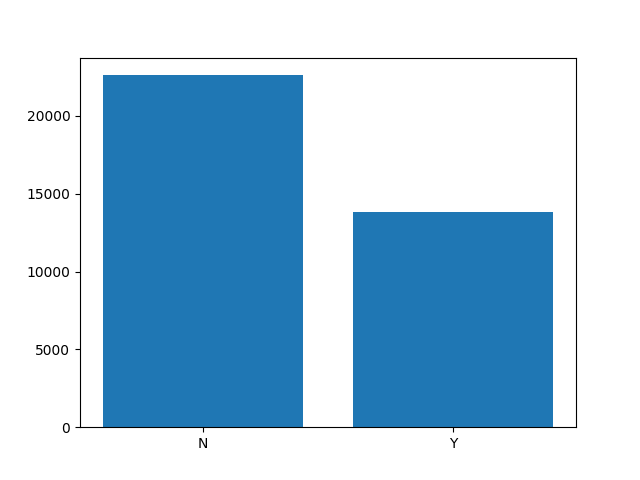

In [33]:
#Selected out the columns
#Ready for visualization
plt.close()
g = df1['FLAG_OWN_CAR'].value_counts()
plt.bar(g.index,g.values)
plt.show()
%matplot plt

In [ ]:
#From the bar chart, we can see many people don't have a car
#13843 people have a car maybe implies their living quality is bit higher

In [14]:
#Continue with Categorical columns, the next one would be whether having realty or not
#Getting the counts first
df.groupBy('FLAG_OWN_REALTY').count().orderBy('Count').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------+-----+
|FLAG_OWN_REALTY|count|
+---------------+-----+
|              N|11951|
|              Y|24506|
+---------------+-----+

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

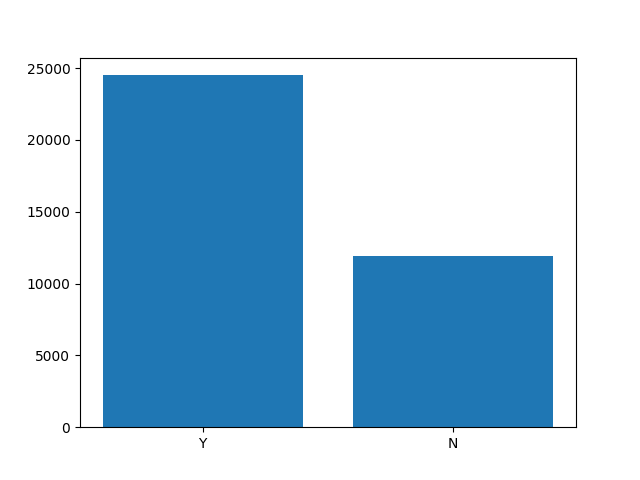

In [10]:
#Selected out the columns
#Ready for visualization
plt.close()
g = df1['FLAG_OWN_REALTY'].value_counts()
plt.bar(g.index,g.values)
plt.show()
%matplot plt

In [ ]:
#The chart shows that majority of people have realty. There are 11951 people who don't have

In [18]:
#Continue with Categorical columns, the next one would be income category
#Getting the counts first
df.groupBy('NAME_INCOME_TYPE').count().orderBy('Count').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|    NAME_INCOME_TYPE|count|
+--------------------+-----+
|             Student|   11|
|       State servant| 2985|
|           Pensioner| 6152|
|Commercial associate| 8490|
|             Working|18819|
+--------------------+-----+

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

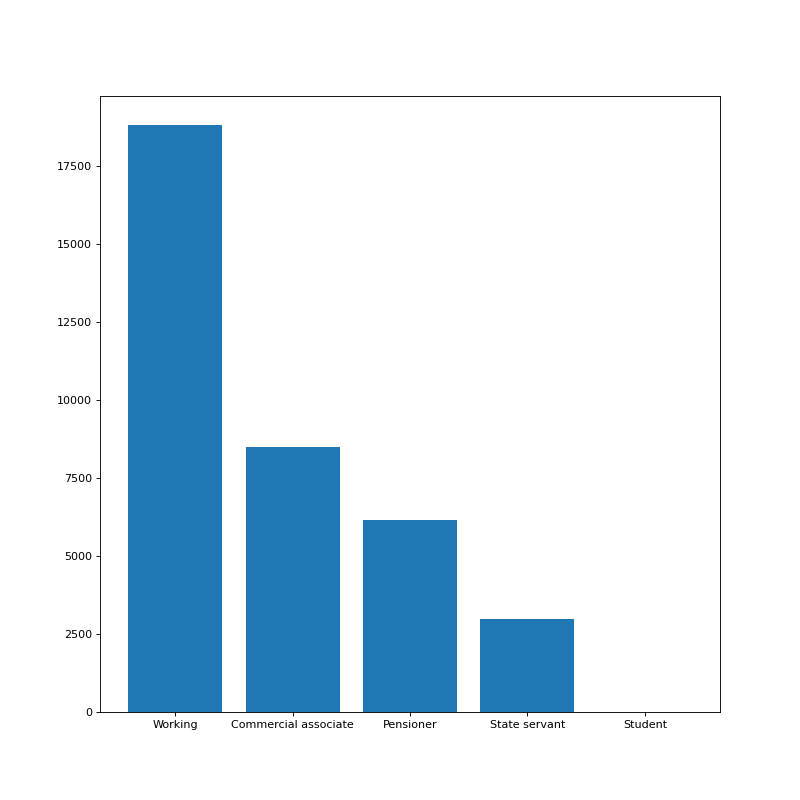

In [20]:
#Selected out the columns
#Ready for visualization
plt.close()
g = df1['NAME_INCOME_TYPE'].value_counts()
figure(figsize=(10, 10), dpi=80)
plt.bar(g.index,g.values)
plt.show()
%matplot plt

In [ ]:
#We can see that most people are working
#It's intresting to see only 11 studetns are applying credit card

In [21]:
#Continue with Categorical columns, the next one would be education
#Getting the counts first
df.groupBy('NAME_EDUCATION_TYPE').count().orderBy('Count').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
| NAME_EDUCATION_TYPE|count|
+--------------------+-----+
|     Academic degree|   32|
|     Lower secondary|  374|
|   Incomplete higher| 1410|
|    Higher education| 9864|
|Secondary / secon...|24777|
+--------------------+-----+

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

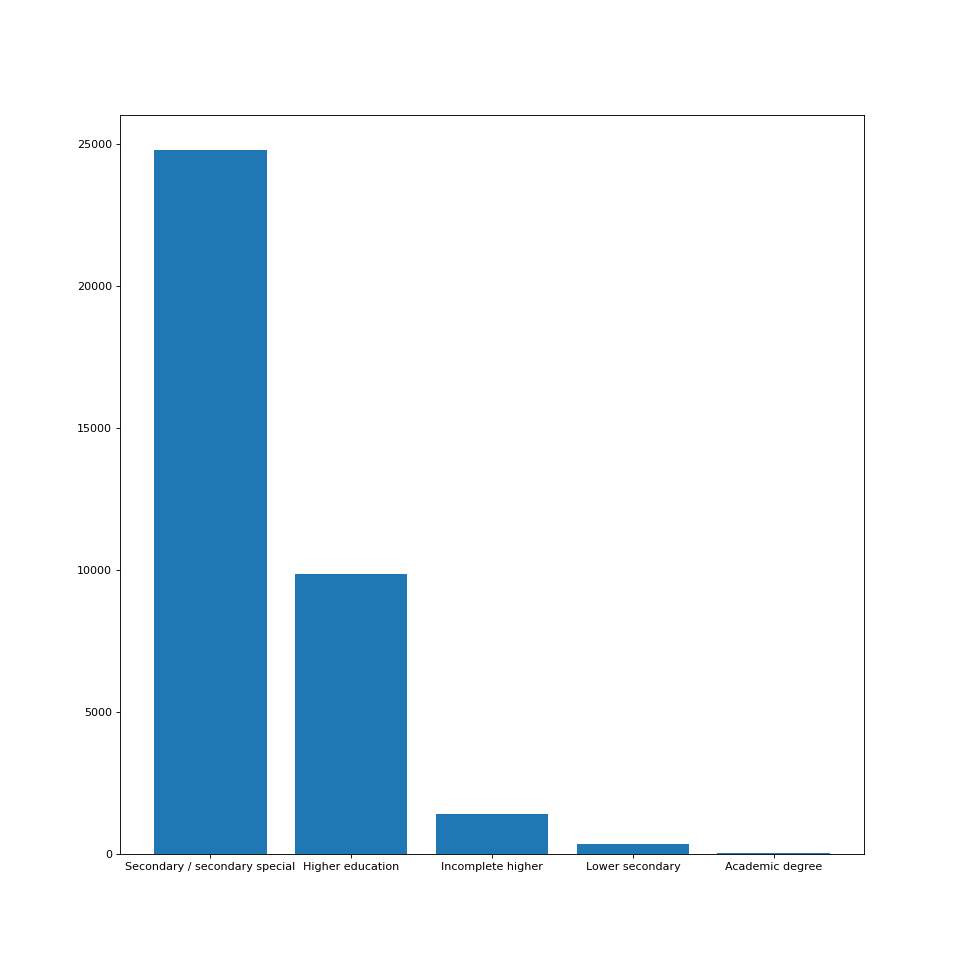

In [22]:
#Selected out the columns
#Ready for visualization
plt.close()
g = df1['NAME_EDUCATION_TYPE'].value_counts()
figure(figsize=(12, 12), dpi=80)
plt.bar(g.index,g.values)
plt.show()
%matplot plt

In [ ]:
#We think education can be a important factor for ML models
#Most people fall in to the category of secondary. It's good to see many people have higher education

In [24]:
#Continue with Categorical columns, the next one would be marital status
#Getting the counts first
df.groupBy('NAME_FAMILY_STATUS').count().orderBy('Count').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|  NAME_FAMILY_STATUS|count|
+--------------------+-----+
|               Widow| 1532|
|           Separated| 2103|
|      Civil marriage| 2945|
|Single / not married| 4829|
|             Married|25048|
+--------------------+-----+

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

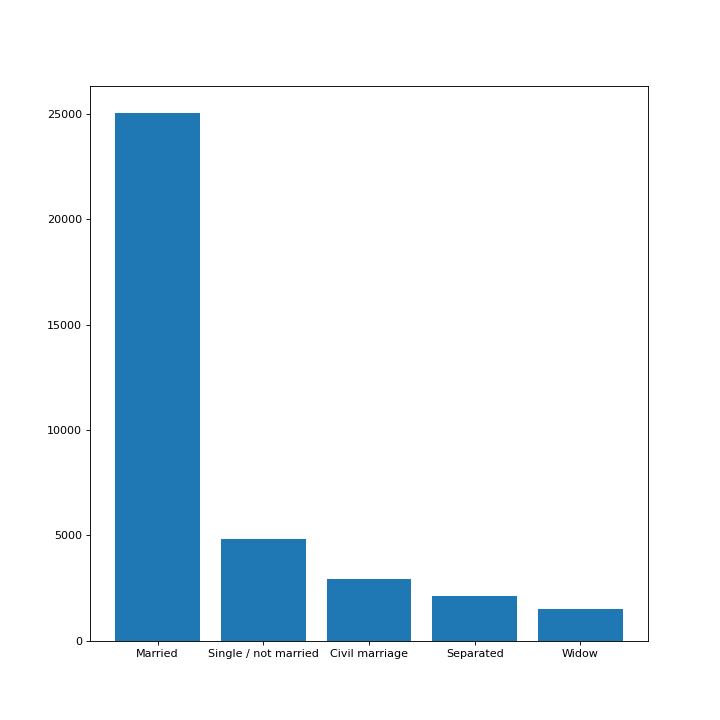

In [24]:
#Selected out the columns
#Ready for visualization
plt.close()
g = df1['NAME_FAMILY_STATUS'].value_counts()
figure(figsize=(9, 9), dpi=80)
plt.bar(g.index,g.values)
plt.show()
%matplot plt

In [ ]:
#We can see most clients have married. Other categories only made up a small portions
#Not too many single people

In [27]:
#Continue with Categorical columns, the next one would be way of living
#Getting the counts first
df.groupBy('NAME_HOUSING_TYPE').count().orderBy('Count').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-----+
|  NAME_HOUSING_TYPE|count|
+-------------------+-----+
|    Co-op apartment|  168|
|   Office apartment|  262|
|   Rented apartment|  575|
|Municipal apartment| 1128|
|       With parents| 1776|
|  House / apartment|32548|
+-------------------+-----+

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

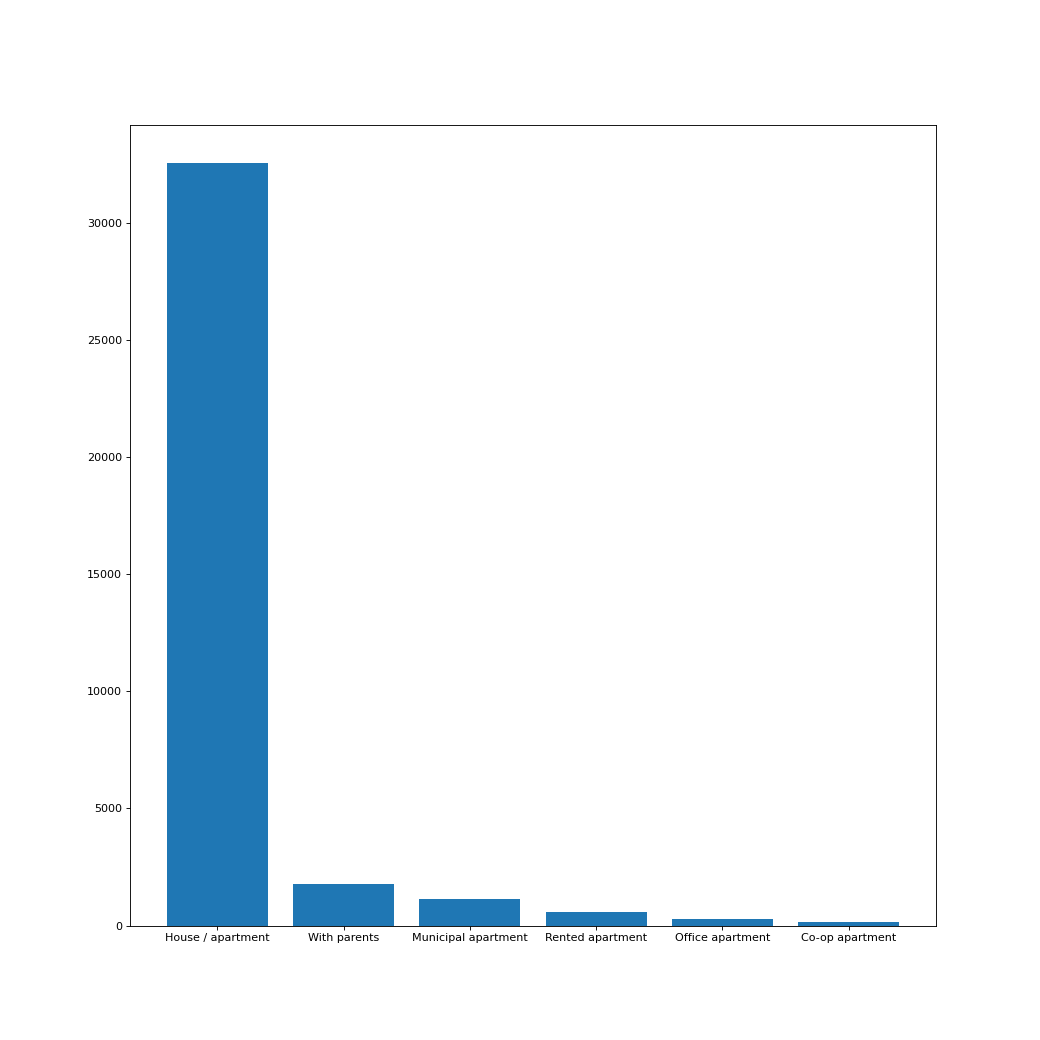

In [26]:
#Selected out the columns
#Ready for visualization
plt.close()
g = df1['NAME_HOUSING_TYPE'].value_counts()
figure(figsize=(13, 13), dpi=80)
plt.bar(g.index,g.values)
plt.show()
%matplot plt

In [ ]:
#Most people live in house or apartment. This column should be a important factor
#Because it can imply whether a client has living issue

In [34]:
#Last categorical columns, it would be y variable, approve or not
#Getting the counts first
df.groupBy('STATUS').count().orderBy('Count').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------+-----+
|STATUS|count|
+------+-----+
|     1| 4291|
|     0|32166|
+------+-----+

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

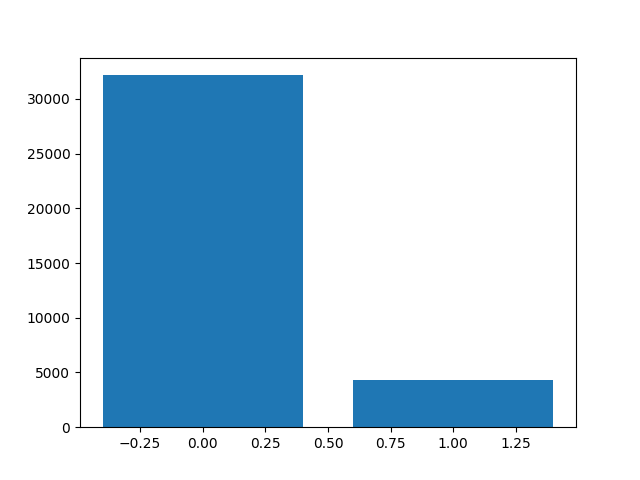

In [39]:
#Selected out the columns
#Ready for visualization
plt.close()
g = df1['STATUS'].value_counts()
plt.bar(g.index,g.values)
plt.show()
%matplot plt

In [ ]:
#0 means good clients, thus approved. 1 means bad clients
#It's nice to see only a small amount of people have trouble with their status

#We skipped four meaningless categorical columns for visualization(Flaged phone|mobile|work phone|email)
#We think these four columns are not really necessary for model building

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

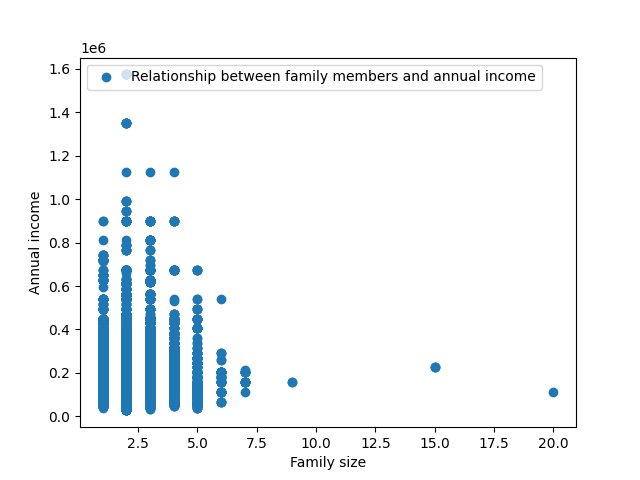

In [43]:
#Now for scatter plot for family members and annual income
plt.close()
plt.scatter(df1['CNT_FAM_MEMBERS']
         , df1['AMT_INCOME_TOTAL'], 
            label="Relationship between family members and annual income")
plt.xlabel("Family size")
plt.ylabel("Annual income")
plt.legend(loc='upper left')
plt.show()
%matplot plt

In [ ]:
#It seems like annual income and family size doesn't have clear relationship
#We thought having more family members meaning the income must be really high

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

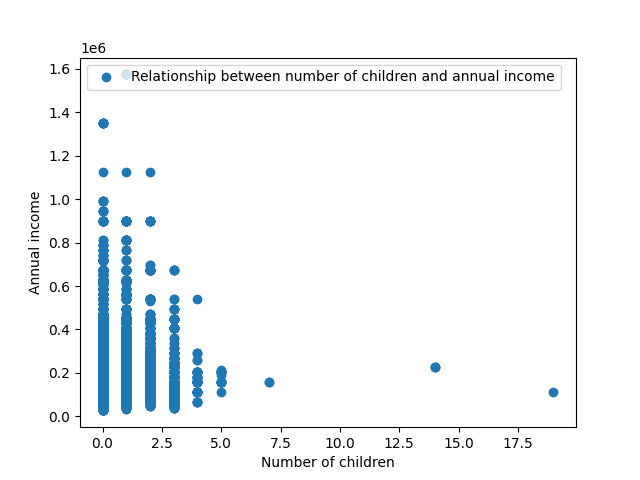

In [46]:
#Scatter plot for number of children and annual income
plt.close()
plt.scatter(df1['CNT_CHILDREN']
         , df1['AMT_INCOME_TOTAL'], 
            label="Relationship between number of children and annual income")
plt.xlabel("Number of children")
plt.ylabel("Annual income")
plt.legend(loc='upper left')
plt.show()
%matplot plt

In [ ]:
#This seems interesting, people who have no children will have a very high annual income
#We can see as having more children, the annual income is decreasing. There must be some negative correlation

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

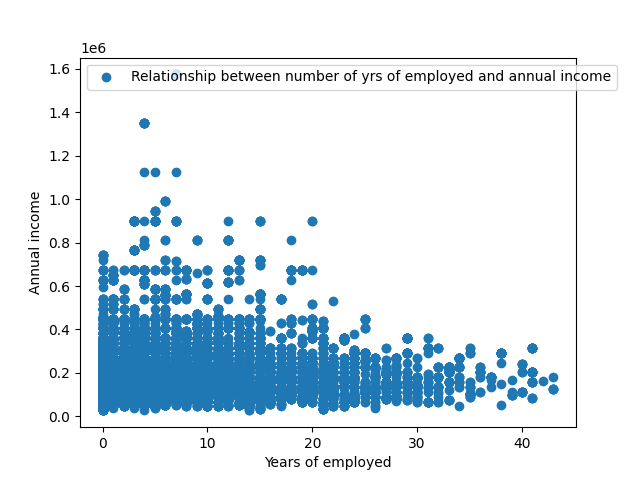

In [47]:
#Lastly, Scatter plot for employed years and annual income
plt.close()
plt.scatter(df1['YEARS_EMPLOYED']
         , df1['AMT_INCOME_TOTAL'], 
            label="Relationship between number of yrs of employed and annual income")
plt.xlabel("Years of employed")
plt.ylabel("Annual income")
plt.legend(loc='upper left')
plt.show()
%matplot plt

In [ ]:
#It seems like there is no clear pattern. We can see some people has high annual income but < 5 yrs of working
#But a small pattern we can see is that if the year employed very high, or in other word, if a person stay
#in company very long, the annual income would not very high according to the graph

In [ ]:
'''
5.
    Dealing with outlier
'''

In [60]:
#outlier columns we have decided to deal with are: number of children, income, and family size
#First one will be number of children
#Filter out children < 4
#Use count to check sucess or not
df_filtered=df.filter(df.CNT_CHILDREN<4)
print(df_filtered.groupBy('CNT_CHILDREN').count().orderBy('Count').show())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+-----+
|CNT_CHILDREN|count|
+------------+-----+
|           3|  419|
|           2| 3256|
|           1| 7492|
|           0|25201|
+------------+-----+

None

In [ ]:
#The reason choosing the threhold 4 is because we saw the outliers in the desciptive statistics
#4 is a good number to filter out those outliers

In [61]:
#Next one will be anual income
#If not in 3 SD range, it would be outliers
df_filtered=df_filtered.filter(df.AMT_INCOME_TOTAL<186720.905+101865.255*3)
df_filtered=df_filtered.filter(df.AMT_INCOME_TOTAL>186720.905-101865.255*3)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
#This time, we use the common method. We cut off the lower and upper bond
#We make sure data are within the 3 standard deviation range

In [62]:
#Next one will be family size
#Again, same method, if outside of 3 SD range, it would be outliers
df_filtered=df_filtered.filter(df.CNT_FAM_MEMBERS<2.1984+0.9116*3)
df_filtered=df_filtered.filter(df.CNT_FAM_MEMBERS>2.1984-0.9116*3)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
#Still the same method as above
#We make sure data are within the 3 standard deviation range

In [63]:
#We'll count the number of orginal vs filtered one
df.count(), df_filtered.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(36457, 35470)

In [64]:
#Do a math to see if we removed over 3% of the data
1-35470/36457

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

0.027072990097923633

In [ ]:
#0.027 is almost 3% of the data, but in this case, we are fine

In [ ]:
'''
6.
    Rerun descriptive statistics and histogram
'''

In [70]:
#We'll rerun stats for the above three columns which we have filtered out
print(df_filtered.select('CNT_CHILDREN').describe().show())
print(df_filtered.select('AMT_INCOME_TOTAL').describe().show())
print(df_filtered.select('CNT_FAM_MEMBERS').describe().show())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-------------------+
|summary|       CNT_CHILDREN|
+-------+-------------------+
|  count|              35470|
|   mean|0.38993515647025656|
| stddev| 0.6506536411393978|
|    min|                  0|
|    max|                  3|
+-------+-------------------+

None
+-------+-----------------+
|summary| AMT_INCOME_TOTAL|
+-------+-----------------+
|  count|            35470|
|   mean|179849.4968846913|
| stddev|81522.22378996917|
|    min|          27000.0|
|    max|         472500.0|
+-------+-----------------+

None
+-------+------------------+
|summary|   CNT_FAM_MEMBERS|
+-------+------------------+
|  count|             35470|
|   mean| 2.155709049901325|
| stddev|0.8327202162590296|
|    min|                 1|
|    max|                 4|
+-------+------------------+

None

In [ ]:
#This looks much better compare to the orginal datasets
#By checking min and max, we can clearly see outliers are gone

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

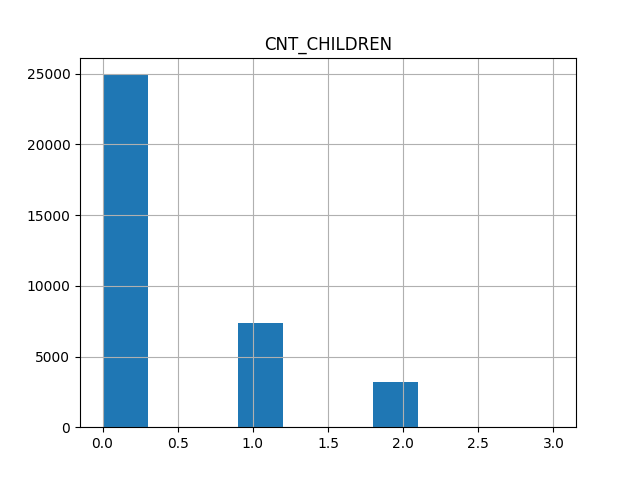

In [72]:
#Next we'll rerun histograms from three variables
df_filtered.select('CNT_CHILDREN').toPandas().hist()
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

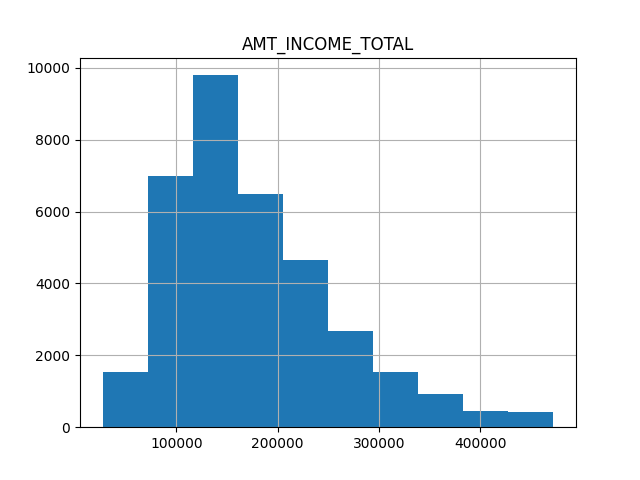

In [73]:
df_filtered.select('AMT_INCOME_TOTAL').toPandas().hist()
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

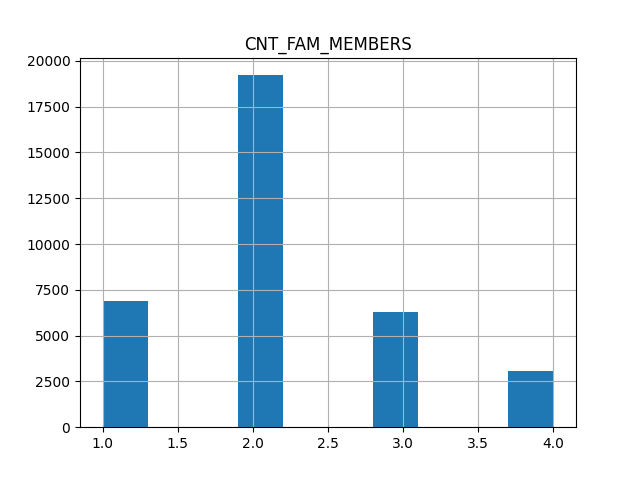

In [74]:
df_filtered.select('CNT_FAM_MEMBERS').toPandas().hist()
%matplot plt

In [ ]:
#Looks much better than previous three, orginal histograms have extreme skewed problem
#Now they are better, we think we shouldn't remove any more data

In [77]:
#We'll write to csv, so we can get a new dataset
df_filtered.write.format('csv').option('header',True).mode('overwrite').option('sep',',').save('s3://mybucketname32/Project/Credit_Card_preprocessed.csv')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Milestone 3

In [1]:
'''First, import modules and read the csv which we get from milestone 2'''

import pyspark.sql.functions as F
import pyspark.ml.feature as feat
import numpy as np
df = spark.read.csv('s3://mybucketname32/Project/Credit_Card_preprocessed.csv/Credit_Card_preprocessed.csv',
                    header=True,
                    inferSchema=True)
df.show(1, vertical=True)

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1628277885833_0001,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

-RECORD 0-------------------------------
 ID                  | 5008804          
 CODE_GENDER         | M                
 FLAG_OWN_CAR        | Y                
 FLAG_OWN_REALTY     | Y                
 CNT_CHILDREN        | 0                
 AMT_INCOME_TOTAL    | 427500.0         
 NAME_INCOME_TYPE    | Working          
 NAME_EDUCATION_TYPE | Higher education 
 NAME_FAMILY_STATUS  | Civil marriage   
 NAME_HOUSING_TYPE   | Rented apartment 
 AGE_YEARS           | 33               
 YEARS_EMPLOYED      | 12               
 FLAG_MOBIL          | 1                
 FLAG_WORK_PHONE     | 1                
 FLAG_PHONE          | 0                
 FLAG_EMAIL          | 0                
 CNT_FAM_MEMBERS     | 2                
 STATUS              | 1                
only showing top 1 row

In [ ]:
'''It's better to see it vertically. The above output is just to make sure the file is correct'''

1. Correlations and their interpretations

In [ ]:
'''Let's save this part just for now. 
After we finish the data transformation next section, we can come back and do the correlations.'''

In [4]:
'''Now, we finished the section 2, we can do correlations. Notice that although every columns have numeric value,
many of those represents categories. The are only five columns we can use for correlation, and they are:
#ofChildren, Annual_income, Age, Years_Employed, Family_size'''

from pyspark.ml.linalg import DenseMatrix, Vectors
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

df1 = df.select('CNT_CHILDREN','AMT_INCOME_TOTAL','AGE_YEARS','YEARS_EMPLOYED','CNT_FAM_MEMBERS')

vector_col = "corr_features"
assembler = VectorAssembler(inputCols=df1.columns, outputCol=vector_col)
df_vector = assembler.transform(df1).select(vector_col)

# get correlation matrix
matrix = Correlation.corr(df_vector, vector_col)
matrix.collect()[0]["pearson({})".format(vector_col)].values

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

array([ 1.        ,  0.03504317, -0.35487758,  0.04153623,  0.8644386 ,
        0.03504317,  1.        , -0.09102575,  0.09653544,  0.02518567,
       -0.35487758, -0.09102575,  1.        , -0.0214407 , -0.30580938,
        0.04153623,  0.09653544, -0.0214407 ,  1.        ,  0.05287235,
        0.8644386 ,  0.02518567, -0.30580938,  0.05287235,  1.        ])

                        CNT_CHILDREN  AMT_INCOME_TOTAL  AGE_YEARS  YEARS_EMPLOYED  CNT_FAM_MEMBERS 
CNT_CHILDREN

AMT_INCOME_TOTAL

AGE_YEARS

YEARS_EMPLOYED

CNT_FAM_MEMBERS 

In [ ]:
'''Looking at the output, we can see that number of children and family size are 86% correlated, which makes
sense because more children means more family members.
It's also interesting to see that age and family members have -30% correlation. Age and numebr_of_Children also
has -35% correlation. These mean the older a person, one will have less family members. 
These -30% and -35% are pretty hard to interpret because we don't know is it because family members are dead,
or they just means previous generations' people don't want to have too many children.
For other variables, there is not much correlation because they all seems pretty low.
'''

2. Data transformation

In [2]:
'''The code below is to convert some categorical columns to dummies. In this case, we chose Gender, Income_type,
and Education_type. Of course, there are other categorical columns such as Family_status, housing_type, 
Having_phone, and Having_email things like those, but we've decided not to use them'''

import pyspark.sql.functions as F 
categ = df.select('CODE_GENDER').distinct().rdd.flatMap(lambda x:x).collect()
exprs = [F.when(F.col('CODE_GENDER') == cat,1).otherwise(0)\
            .alias(str(cat)) for cat in categ]
df = df.select(exprs+df.columns)
categ = df.select('NAME_INCOME_TYPE').distinct().rdd.flatMap(lambda x:x).collect()
exprs = [F.when(F.col('NAME_INCOME_TYPE') == cat,1).otherwise(0)\
            .alias(str(cat)) for cat in categ]
df = df.select(exprs+df.columns)
categ = df.select('NAME_EDUCATION_TYPE').distinct().rdd.flatMap(lambda x:x).collect()
exprs = [F.when(F.col('NAME_EDUCATION_TYPE') == cat,1).otherwise(0)\
            .alias(str(cat)) for cat in categ]
df = df.select(exprs+df.columns)
df.show(1,vertical=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

-RECORD 0-----------------------------------------
 Higher education              | 1                
 Academic degree               | 0                
 Incomplete higher             | 0                
 Secondary / secondary special | 0                
 Lower secondary               | 0                
 Commercial associate          | 0                
 Working                       | 1                
 Pensioner                     | 0                
 Student                       | 0                
 State servant                 | 0                
 M                             | 1                
 F                             | 0                
 ID                            | 5008804          
 CODE_GENDER                   | M                
 FLAG_OWN_CAR                  | Y                
 FLAG_OWN_REALTY               | Y                
 CNT_CHILDREN                  | 0                
 AMT_INCOME_TOTAL              | 427500.0         
 NAME_INCOME_TYPE              

In [ ]:
'''From the output, we can see the dummies' columns successfully created, but still need to do n-1 approach'''

In [3]:
'''We can mannually remove the extra columns that generated by previous codes.
For example for Gender, we don't need that extra 'F' column.
In addition to that, we also want to delete other columns which we think is not useful.
For example for Having_Mobile column, everyone is 1 which makes this column not useful.'''

df = df.drop('CODE_GENDER','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','F','Commercial associate','Academic degree')
df = df.drop('NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','FLAG_MOBIL','FLAG_WORK_PHONE',
             'FLAG_PHONE','FLAG_EMAIL','FLAG_OWN_CAR','FLAG_OWN_REALTY')
df = df.drop('ID')
df.show(1,vertical=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

-RECORD 0---------------------------------
 Higher education              | 1        
 Incomplete higher             | 0        
 Secondary / secondary special | 0        
 Lower secondary               | 0        
 Working                       | 1        
 Pensioner                     | 0        
 Student                       | 0        
 State servant                 | 0        
 M                             | 1        
 CNT_CHILDREN                  | 0        
 AMT_INCOME_TOTAL              | 427500.0 
 AGE_YEARS                     | 33       
 YEARS_EMPLOYED                | 12       
 CNT_FAM_MEMBERS               | 2        
 STATUS                        | 1        
only showing top 1 row

In [ ]:
'''Looks pretty good now, we have necessary columns, and we have dummies.
Now we'll go back to section 1 to do correlation.'''

3.Modeling

In [ ]:
'''Before modeling, let's save the above file first, so even if we mess up, we don't have to run
all the previous processes again.'''
df.write.format('csv').option('header',True).mode('overwrite').option('sep',',').save('s3://mybucketname32/Project/Credit_Card_readyformodel.csv')

In [1]:
'''read the file first'''
df = spark.read.csv('s3://mybucketname32/Project/Credit_Card_readyformodel.csv/Credit_Card_readyformodel.csv',
                    header=True,
                    inferSchema=True)
df.show(1, vertical=True)

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1628628798534_0001,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

-RECORD 0---------------------------------
 Higher education              | 1        
 Incomplete higher             | 0        
 Secondary / secondary special | 0        
 Lower secondary               | 0        
 Working                       | 1        
 Pensioner                     | 0        
 Student                       | 0        
 State servant                 | 0        
 M                             | 1        
 CNT_CHILDREN                  | 0        
 AMT_INCOME_TOTAL              | 427500.0 
 AGE_YEARS                     | 33       
 YEARS_EMPLOYED                | 12       
 CNT_FAM_MEMBERS               | 2        
 STATUS                        | 1        
only showing top 1 row

In [ ]:
'''Ok, it's the correct file'''

In [2]:
'''First we'll try logistic regression, below codes creates the pipeline
and model building, we'll split the data into 80%/20%.'''
import pyspark.ml.classification as cl
import pyspark.ml.feature as feat
from pyspark.ml import Pipeline

df_train, df_test = (df.randomSplit([0.8, 0.2], seed=123))

vectorAssembler = feat.VectorAssembler(
    inputCols=df.columns[0:-1]
    , outputCol='features')

selector = feat.ChiSqSelector(labelCol='STATUS'
    , numTopFeatures=10
    , outputCol='selected')

logReg_obj = cl.LogisticRegression(
    labelCol='STATUS'
    , featuresCol=selector.getOutputCol()
    , regParam=0.01
    , elasticNetParam=1.0
    , family='multinomial')

pipeline = Pipeline(
    stages=[vectorAssembler
        , selector
        , logReg_obj])
pModel = pipeline.fit(df_train)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
'''There is no output for above code, but the model has been created
successfully.'''

In [3]:
'''Now, we'll evaluate the performance of our logistic regression model
after we fitted the model on the test set.'''
import pyspark.ml.evaluation as ev

logReg_model = (pModel.transform(df_test))

results_logReg = logReg_model.select('STATUS', 'probability', 'prediction')

evaluator = ev.MulticlassClassificationEvaluator(
    predictionCol='prediction'
    ,labelCol='STATUS')

(#F-1 score
    print('\nF-1 score: ' + str(evaluator.evaluate(results_logReg)))
    #weighted precision
    , print('Weighted Precision: ' + str(evaluator.evaluate(
        results_logReg
        , {evaluator.metricName: 'weightedPrecision'}
    ))) 
    #accuracy
    , print('Accuracy: ' + str(evaluator.evaluate(
        results_logReg
        , {evaluator.metricName: 'accuracy'}
    ))))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…


F-1 score: 0.8197283600974614
Weighted Precision: 0.7693717967633251
Accuracy: 0.8771384136858476
(None, None, None)

In [ ]:
'''From above output, we can see having a 87% accuracy is pretty good.'''

In [4]:
'''We also want to see which ten features the chisq selected for us'''
print(logReg_model.schema['selected'].metadata)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

{'ml_attr': {'attrs': {'numeric': [{'idx': 0, 'name': 'Incomplete higher'}, {'idx': 1, 'name': 'Lower secondary'}, {'idx': 2, 'name': 'Pensioner'}, {'idx': 3, 'name': 'State servant'}, {'idx': 4, 'name': 'M'}, {'idx': 5, 'name': 'CNT_CHILDREN'}, {'idx': 6, 'name': 'AMT_INCOME_TOTAL'}, {'idx': 7, 'name': 'AGE_YEARS'}, {'idx': 8, 'name': 'YEARS_EMPLOYED'}, {'idx': 9, 'name': 'CNT_FAM_MEMBERS'}]}, 'num_attrs': 10}}

In [ ]:
'''The ten features are within our expectation, nothing surprising'''

In [5]:
'''Then, we'll tune hyperparameters for logistic regression model.
Three things we can tune here are regParam, elesticNetParam, and
ChiSqSelector.'''
import pyspark.ml.tuning as tune
vectorAssembler = feat.VectorAssembler(
    inputCols=df.columns[0:-1]
    , outputCol='features')
selector = feat.ChiSqSelector(
    labelCol='STATUS'
    , numTopFeatures=10
    , outputCol='selected')
logReg_obj = cl.LogisticRegression(
    labelCol='STATUS'
    , featuresCol=selector.getOutputCol()
    , family='multinomial')

logReg_grid = (
    tune.ParamGridBuilder()
    .addGrid(logReg_obj.regParam
            , [0,1])
    .addGrid(logReg_obj.elasticNetParam
             , [0,1])
    .addGrid(selector.numTopFeatures
             , [7,10])
    .build())

logReg_ev = ev.MulticlassClassificationEvaluator(
    predictionCol='prediction'
    , labelCol='STATUS')

cross_v = tune.CrossValidator(
    estimator=logReg_obj
    , estimatorParamMaps=logReg_grid
    , evaluator=logReg_ev)
pipeline = Pipeline(stages=[vectorAssembler, selector])
data_trans = pipeline.fit(df_train)
logReg_modelTest = cross_v.fit(
    data_trans.transform(df_train))
print('Best params - regParam: {}, elasticNetParam: {}, numtop: {}'
      .format(
    logReg_modelTest.bestModel._java_obj.getRegParam(),
      logReg_modelTest.bestModel._java_obj.getElasticNetParam(),
          logReg_modelTest.bestModel))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Best params - regParam: 0.0, elasticNetParam: 0.0, numtop: LogisticRegressionModel: uid = LogisticRegression_4f87e764506a, numClasses = 2, numFeatures = 10

In [ ]:
'''After several trials, we found the best hyperparameters for logistic regression,
reParam: 0
elasticNetParam: 0 
numTopFeatures: 10
'''

In [6]:
'''Last thing for this model is to print out the summary of the performance'''

trainingSummary = logReg_modelTest.bestModel.summary
print("False positive rate by label:")
for i, rate in enumerate(trainingSummary.falsePositiveRateByLabel):
    print("label %d: %s" % (i, rate))
print("True positive rate by label:")
for i, rate in enumerate(trainingSummary.truePositiveRateByLabel):
    print("label %d: %s" % (i, rate))
print("Precision by label:")
for i, prec in enumerate(trainingSummary.precisionByLabel):
    print("label %d: %s" % (i, prec))
print("Recall by label:")
for i, rec in enumerate(trainingSummary.recallByLabel):
    print("label %d: %s" % (i, rec))
print("F-measure by label:")
for i, f in enumerate(trainingSummary.fMeasureByLabel()):
    print("label %d: %s" % (i, f))
    
accuracy = trainingSummary.accuracy
falsePositiveRate = trainingSummary.weightedFalsePositiveRate
truePositiveRate = trainingSummary.weightedTruePositiveRate
fMeasure = trainingSummary.weightedFMeasure()
precision = trainingSummary.weightedPrecision
recall = trainingSummary.weightedRecall
print("Accuracy: %s\nFPR: %s\nTPR: %s\nF-measure: %s\nPrecision: %s\nRecall: %s"
      % (accuracy, falsePositiveRate, truePositiveRate, fMeasure, precision, recall))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

False positive rate by label:
label 0: 1.0
label 1: 0.0
True positive rate by label:
label 0: 1.0
label 1: 0.0
Precision by label:
label 0: 0.8845652709793288
label 1: 0.0
Recall by label:
label 0: 1.0
label 1: 0.0
F-measure by label:
label 0: 0.938747290529935
label 1: 0.0
Accuracy: 0.8845652709793288
FPR: 0.8845652709793288
TPR: 0.8845652709793288
F-measure: 0.8303832514287226
Precision: 0.7824557186227334
Recall: 0.8845652709793288

In [ ]:
'''From the above output, we can see the accuracy is 0.88 and F1 score is 0.83.
Both of these measures are slightly better than the one that we didn't tune the hyperparameter.'

In [11]:
'''Then, we'll try random forest, below codes creates the pipeline
and model building. The evaluation will be printed out at the end'''
import pyspark.ml.classification as cl
import pyspark.ml.feature as feat
from pyspark.ml import Pipeline

df_train, df_test = (df.randomSplit([0.8, 0.2], seed=123))
vectorAssembler = feat.VectorAssembler(
    inputCols=df.columns[0:-1]
    , outputCol='features')
selector = feat.ChiSqSelector(labelCol='STATUS'
    , numTopFeatures=10
    , outputCol='selected')

rf_obj = cl.RandomForestClassifier(
    labelCol='STATUS'
    , featuresCol=selector.getOutputCol()
    , minInstancesPerNode=5
    , maxDepth = 4
    , numTrees=5)

pipeline = Pipeline(stages=[vectorAssembler, selector, rf_obj])

pModel = pipeline.fit(df_train)

rf_obj_trained = (
    pModel
    .transform(df_test))
results_rf = rf_obj_trained.select('STATUS', 'probability', 'prediction')

evaluator = ev.MulticlassClassificationEvaluator(
    predictionCol='prediction'
    , labelCol='STATUS')

(print('\nF-1 score: ' + str(evaluator.evaluate(results_rf)))
    , print('Weighted Precision: ' + str(evaluator.evaluate(
        results_rf
        , {evaluator.metricName: 'weightedPrecision'})))
    , print('Accuracy: ' + str(evaluator.evaluate(
        results_rf
        , {evaluator.metricName: 'accuracy'}))))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…


F-1 score: 0.8197283600974614
Weighted Precision: 0.7693717967633251
Accuracy: 0.8771384136858476
(None, None, None)

In [ ]:
'''From the above output, we can see the performance is pretty similar to logistic regression.'''

In [8]:
'''Below, we'll tune the hyperparameters. We expect to see the best parameters
for random forest. '''
import pyspark.ml.tuning as tune

vectorAssembler = feat.VectorAssembler(
    inputCols=df.columns[0:-1]
    , outputCol='features')

selector = feat.ChiSqSelector(
    labelCol='STATUS'
    , numTopFeatures=10
    , outputCol='selected')

rf_obj = cl.RandomForestClassifier(
    labelCol='STATUS'
    , featuresCol=selector.getOutputCol()
    , minInstancesPerNode=5
    , maxDepth = 4
    , numTrees=10
)

logReg_grid = (
    tune.ParamGridBuilder()
    #try 3 values for regParam
    .addGrid(rf_obj.minInstancesPerNode
            , [3,5]
        )
    #try 3 values for elasticNetParam
    .addGrid(rf_obj.maxDepth
            , [3,4]
        )
    .addGrid(rf_obj.numTrees
            , [10,9]
        )
    .build()
)

logReg_ev = ev.MulticlassClassificationEvaluator(
    predictionCol='prediction'
    , labelCol='STATUS')
cross_v = tune.CrossValidator(
    estimator=rf_obj
    , estimatorParamMaps=logReg_grid
    , evaluator=logReg_ev
)
pipeline = Pipeline(stages=[vectorAssembler, selector])
data_trans = pipeline.fit(df_train)

logReg_modelTest = cross_v.fit(
    data_trans.transform(df_train))
print('Best params - MaxDepth: {}, MinInstancesPerNode: {}, numTrees: {}'.format(
    logReg_modelTest.bestModel._java_obj.getMaxDepth(),
      logReg_modelTest.bestModel._java_obj.getMinInstancesPerNode(),
        logReg_modelTest.bestModel._java_obj.getNumTrees()))  

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Best params - MaxDepth: 4, MinInstancesPerNode: 5, numTrees: 9

In [ ]:
'''After several trials, we found the best hyperparameters for random forest,
MaxDepth: 4
minInstancesPerNode: 5 
numTrees: 9
'''

In [10]:
'''Lastly, let's use the above parameter to run random forest again.
We expect there should be a improvement.'''
import pyspark.ml.classification as cl
import pyspark.ml.feature as feat
from pyspark.ml import Pipeline

df_train, df_test = (df.randomSplit([0.8, 0.2], seed=123))
vectorAssembler = feat.VectorAssembler(
    inputCols=df.columns[0:-1]
    , outputCol='features')
selector = feat.ChiSqSelector(labelCol='STATUS'
    , numTopFeatures=10
    , outputCol='selected')

rf_obj = cl.RandomForestClassifier(
    labelCol='STATUS'
    , featuresCol=selector.getOutputCol()
    , minInstancesPerNode=5
    , maxDepth = 4
    , numTrees=9)

pipeline = Pipeline(stages=[vectorAssembler, selector, rf_obj])

pModel = pipeline.fit(df_train)

rf_obj_trained = (
    pModel
    .transform(df_test))
results_rf = rf_obj_trained.select('STATUS', 'probability', 'prediction')

evaluator = ev.MulticlassClassificationEvaluator(
    predictionCol='prediction'
    , labelCol='STATUS')

(print('\nF-1 score: ' + str(evaluator.evaluate(results_rf)))
    , print('Weighted Precision: ' + str(evaluator.evaluate(
        results_rf
        , {evaluator.metricName: 'weightedPrecision'})))
    , print('Accuracy: ' + str(evaluator.evaluate(
        results_rf
        , {evaluator.metricName: 'accuracy'}))))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…


F-1 score: 0.821442917772369
Weighted Precision: 0.8927776472234618
Accuracy: 0.8778453273010038
(None, None, None)

In [ ]:
'''From the output, we can see after tunning the hyperparameter, F-1 score and Accuracy
become higher.'''

In [ ]:
'''In conclusion, we think logistic regression is better than the random forest model
with a slightly higher performance.
We would choose logistic regression model for predicting credit card application approval,
and we think it will work pretty well.'''